# **Automobiles Price Prediction Model**

## Introduction
In this notebook, we'll develop a machine learning model to predict the prices of automobiles based on various features. Predicting automobile prices accurately can be beneficial for both buyers and sellers in making informed decisions.

## **Exploratory Data Analysis**
Before diving into model building, let's explore the dataset to gain insights into the distribution and relationships of different variables. We'll visualize the data using histograms, scatter plots, and other techniques to understand its characteristics.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from warnings import filterwarnings
filterwarnings('ignore')

pd.set_option('display.max_columns', None)

In [2]:
df = pd.read_csv(r"Data\automobile_data.csv")

In [10]:
df.head(10)

,Date,Car_id,Body Style,Suma de Annual Income,Color,Company,Customer Name,Dealer_Name,Dealer_No,Dealer_Region,Engine,Gender,Model,Suma de Phone,Suma de Price ($),Transmission,Transmission.1,Transmission.2
0,2022-01-02 00:00:00,C_CND_000001,SUV,13500,Black,Ford,Geraldine,Buddy Storbeck's Diesel Service Inc,06457-3834,Middletown,DoubleÂ Overhead Camshaft,Male,Expedition,8264678,26000,Auto,Auto,Auto
1,2022-01-02 00:00:00,C_CND_000002,SUV,1480000,Black,Dodge,Gia,C & M Motors Inc,60504-7114,Aurora,DoubleÂ Overhead Camshaft,Male,Durango,6848189,19000,Auto,Auto,Auto
2,2022-01-02 00:00:00,C_CND_000003,Passenger,1035000,Red,Cadillac,Gianna,Capitol KIA,38701-8047,Greenville,Overhead Camshaft,Male,Eldorado,7298798,31500,Manual,Manual,Manual
3,2022-01-02 00:00:00,C_CND_000004,SUV,13500,Pale White,Toyota,Giselle,Chrysler of Tri-Cities,99301-3882,Pasco,Overhead Camshaft,Male,Celica,6257557,14000,Manual,Manual,Manual
4,2022-01-02 00:00:00,C_CND_000005,Hatchback,1465000,Red,Acura,Grace,Chrysler Plymouth,53546-9427,Janesville,DoubleÂ Overhead Camshaft,Male,TL,7081483,24500,Auto,Auto,Auto
5,2022-01-02 00:00:00,C_CND_000006,Hatchback,850000,Pale White,Mitsubishi,Guadalupe,Classic Chevy,85257-3102,Scottsdale,Overhead Camshaft,Male,Diamante,7315216,12000,Manual,Manual,Manual
6,2022-01-02 00:00:00,C_CND_000007,Passenger,1600000,Pale White,Toyota,Hailey,Clay Johnson Auto Sales,78758-7841,Austin,Overhead Camshaft,Male,Corolla,7727879,14000,Manual,Manual,Manual
7,2022-01-02 00:00:00,C_CND_000008,Passenger,13500,Pale White,Mitsubishi,Graham,U-Haul CO,78758-7841,Austin,DoubleÂ Overhead Camshaft,Male,Galant,6206512,42000,Auto,Auto,Auto
8,2022-01-02 00:00:00,C_CND_000009,Hardtop,815000,Pale White,Chevrolet,Naomi,Rabun Used Car Sales,85257-3102,Pasco,Overhead Camshaft,Male,Malibu,7194857,82000,Manual,Manual,Manual
9,2022-01-02 00:00:00,C_CND_000010,Passenger,13500,Pale White,Ford,Grayson,Rabun Used Car Sales,85257-3102,Scottsdale,DoubleÂ Overhead Camshaft,Female,Escort,7836892,15000,Auto,Auto,Auto


Drop unwanted columns and generalize the naming of the columns

In [11]:
df.drop(columns= ['Transmission.1', 'Transmission.2', 'Suma de Phone'], inplace= True)
df.columns = [col.replace('Suma de', '').replace('($)', '').lower().strip().replace(' ', '_') for col in df.columns]
df.head()

,date,car_id,body_style,annual_income,color,company,customer_name,dealer_name,dealer_no,dealer_region,engine,gender,model,price,transmission
0,2022-01-02 00:00:00,C_CND_000001,SUV,13500,Black,Ford,Geraldine,Buddy Storbeck's Diesel Service Inc,06457-3834,Middletown,DoubleÂ Overhead Camshaft,Male,Expedition,26000,Auto
1,2022-01-02 00:00:00,C_CND_000002,SUV,1480000,Black,Dodge,Gia,C & M Motors Inc,60504-7114,Aurora,DoubleÂ Overhead Camshaft,Male,Durango,19000,Auto
2,2022-01-02 00:00:00,C_CND_000003,Passenger,1035000,Red,Cadillac,Gianna,Capitol KIA,38701-8047,Greenville,Overhead Camshaft,Male,Eldorado,31500,Manual
3,2022-01-02 00:00:00,C_CND_000004,SUV,13500,Pale White,Toyota,Giselle,Chrysler of Tri-Cities,99301-3882,Pasco,Overhead Camshaft,Male,Celica,14000,Manual
4,2022-01-02 00:00:00,C_CND_000005,Hatchback,1465000,Red,Acura,Grace,Chrysler Plymouth,53546-9427,Janesville,DoubleÂ Overhead Camshaft,Male,TL,24500,Auto


### Descriptive Statistics

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23906 entries, 0 to 23905
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   date           23906 non-null  object
 1   car_id         23906 non-null  object
 2   body_style     23906 non-null  object
 3   annual_income  23906 non-null  int64 
 4   color          23906 non-null  object
 5   company        23906 non-null  object
 6   customer_name  23906 non-null  object
 7   dealer_name    23906 non-null  object
 8   dealer_no      23906 non-null  object
 9   dealer_region  23906 non-null  object
 10  engine         23906 non-null  object
 11  gender         23906 non-null  object
 12  model          23906 non-null  object
 13  price          23906 non-null  int64 
 14  transmission   23906 non-null  object
dtypes: int64(2), object(13)
memory usage: 2.7+ MB


In [13]:
df.date = pd.to_datetime(df.date)  # change to datetime dtype
df.sort_values('date', inplace= True)

In [14]:
desc_df = df.describe()

def format_large_floats(x):
    return '{:.2f}'.format(x)

desc_df.annual_income = desc_df.annual_income.apply(format_large_floats)
desc_df.price = desc_df.price.apply(format_large_floats)
desc_df

,annual_income,price
count,23906.00,23906.00
mean,830840.29,28090.25
std,720006.40,14788.69
min,10080.00,1200.00
25%,386000.00,18001.00
50%,735000.00,23000.00
75%,1175750.00,34000.00
max,11200000.00,85800.00


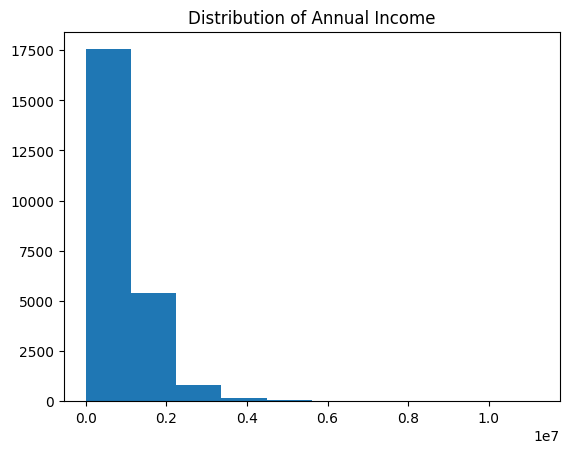

In [15]:
plt.hist(df.annual_income)
plt.title('Distribution of Annual Income');

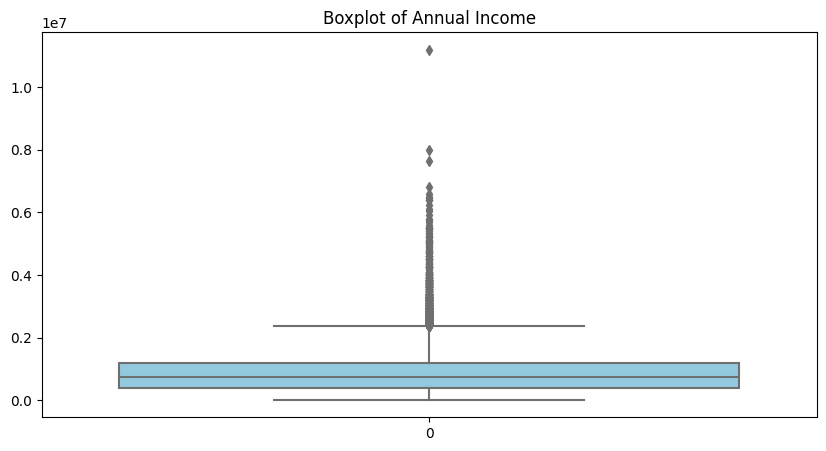

In [16]:
plt.figure(figsize= (10, 5))
sns.boxplot(df.annual_income, color= 'skyblue')
plt.title('Boxplot of Annual Income');

- The data reveals a wide range of income levels, with a mean of $830,840.29 and a standard deviation of $720,006.40, suggesting significant variability. The median income of $735,000 indicates that half of the incomes fall below this value.

- Prices also exhibit variability, with a mean of $28,090.25 and a standard deviation of $14,788.69. The spread ranges from $1,200 to $85,800. The median price of $23,000 suggests that half of the prices are below this value.
- Comparing the mean and median values for both `annual_income` and `price` indicates the presence of outliers skewing the distribution, especially given the differences between means and medians.
- The quartiles provide insights into the spread of the data, indicating that there is variability within the dataset, particularly evident in the wider range between the 25th and 75th percentiles for `annual_income`.

Checking for missing values and duplicates

In [17]:
len(df), len(df.drop_duplicates())

(23906, 23906)

Dividing the annual income to four equally divided categories.

In [18]:
df['income_level'] = pd.qcut(df['annual_income'], q= [0, 0.25, 0.5, 0.75, 1], labels= ['Low', 'Medium', 'High', 'Very High'])
df.reset_index(drop= True, inplace= True)
df.head()

,date,car_id,body_style,annual_income,color,company,customer_name,dealer_name,dealer_no,dealer_region,engine,gender,model,price,transmission,income_level
0,2022-01-02,C_CND_000001,SUV,13500,Black,Ford,Geraldine,Buddy Storbeck's Diesel Service Inc,06457-3834,Middletown,DoubleÂ Overhead Camshaft,Male,Expedition,26000,Auto,Low
1,2022-01-02,C_CND_000021,Sedan,13500,Black,Toyota,Adrianna,Clay Johnson Auto Sales,78758-7841,Austin,Overhead Camshaft,Male,4Runner,25000,Manual,Low
2,2022-01-02,C_CND_000022,Hardtop,2500000,Black,Infiniti,Joshua,Classic Chevy,85257-3102,Austin,DoubleÂ Overhead Camshaft,Male,I30,21000,Auto,Very High
3,2022-01-02,C_CND_000024,Passenger,920000,Pale White,Porsche,Arthur,Star Enterprises Inc,99301-3882,Pasco,DoubleÂ Overhead Camshaft,Male,Carrera Cabrio,18000,Auto,High
4,2022-01-02,C_CND_000025,Passenger,672000,Pale White,Volkswagen,Lizzie,Suburban Ford,53546-9427,Janesville,DoubleÂ Overhead Camshaft,Male,Jetta,22000,Auto,Medium


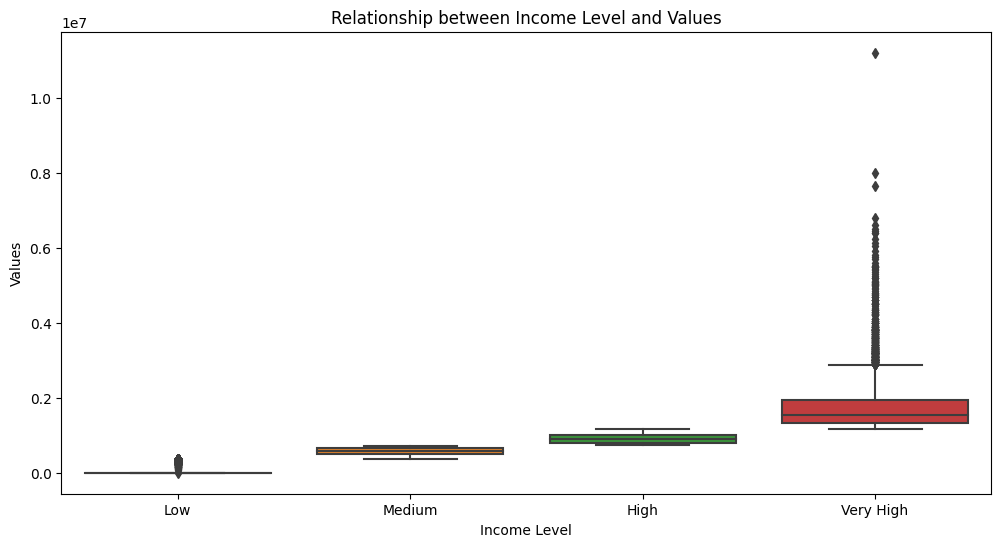

In [19]:
plt.figure(figsize= (12, 6))
sns.boxplot(x= 'income_level', y= 'annual_income', data= df)
plt.xlabel('Income Level')
plt.ylabel('Values')
plt.title('Relationship between Income Level and Values');

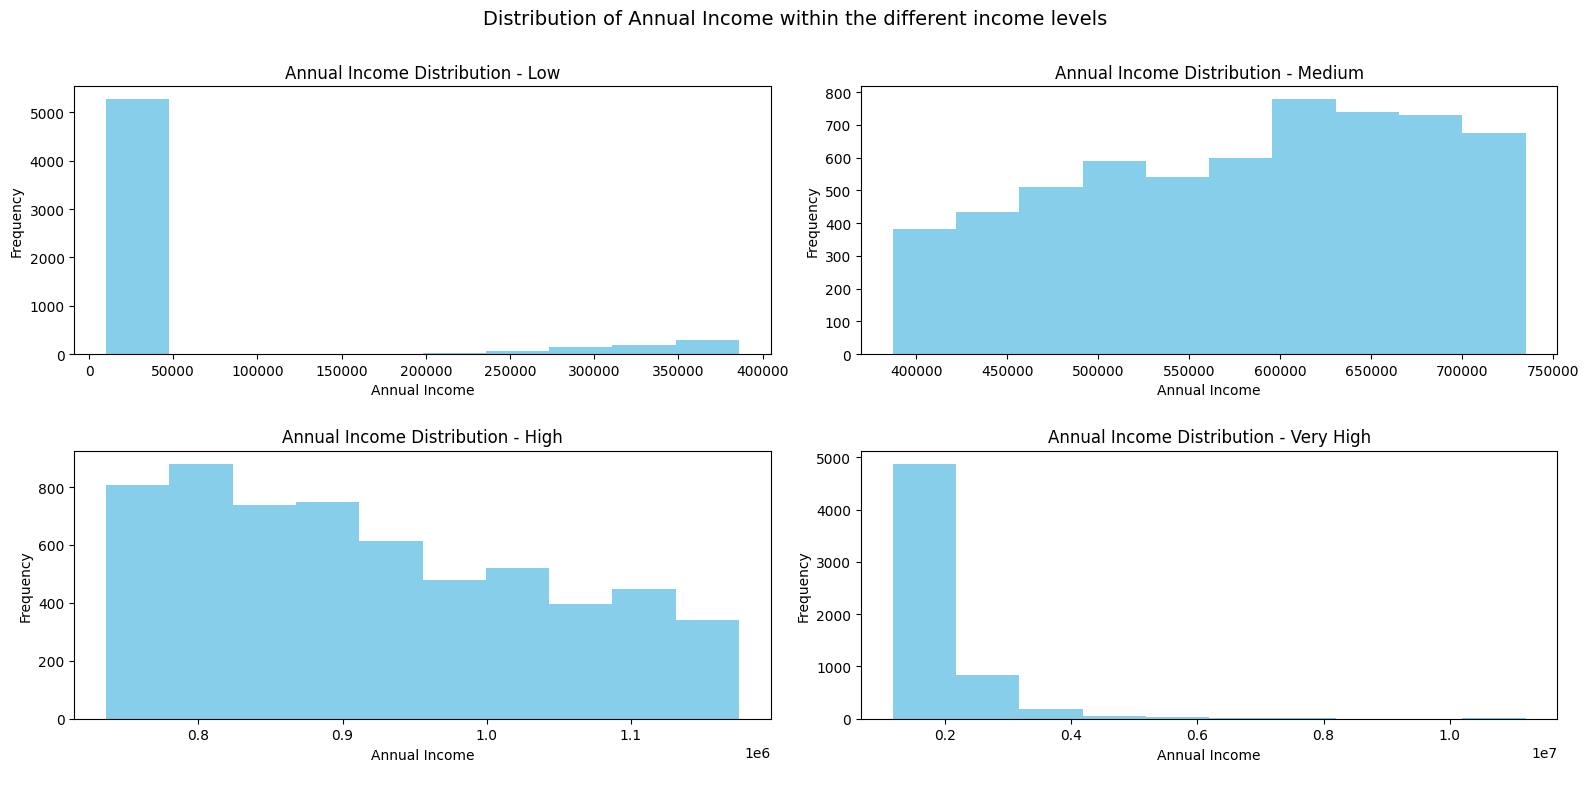

In [20]:
fig, axes = plt.subplots(nrows= 2, ncols= 2, figsize= (16, 8))
axes = axes.flatten()

for i, category in enumerate(['Low', 'Medium', 'High', 'Very High']):
    ax = axes[i]

    df[df['income_level'] == category].annual_income.hist(ax=ax, color='skyblue')
    ax.set_title(f'Annual Income Distribution - {category}', fontsize=12)
    ax.set_xlabel('Annual Income\n', fontsize=10)
    ax.set_ylabel('Frequency', fontsize=10)
    ax.grid(False)


plt.suptitle('Distribution of Annual Income within the different income levels\n', fontsize= 14)
plt.tight_layout()


Average price of car purchased across different income levels.

In [21]:
df.groupby('income_level')['price'].mean()

income_level
Low          27954.276468
Medium       27974.380371
High         28288.664936
Very High    28144.058223
Name: price, dtype: float64

In [22]:
df[df['annual_income'] == df['annual_income'].min()]  # purchase record of the person with the least annual income

,date,car_id,body_style,annual_income,color,company,customer_name,dealer_name,dealer_no,dealer_region,engine,gender,model,price,transmission,income_level
23473,2023-12-24,C_CND_023452,Hardtop,10080,Red,Infiniti,Andy,Pitre Buick-Pontiac-Gmc of Scottsdale,99301-3882,Pasco,Overhead Camshaft,Male,I30,22801,Manual,Low


In [23]:
df[df['annual_income'] == df['annual_income'].max()]  # purchase record of the person with the highest annual income

,date,car_id,body_style,annual_income,color,company,customer_name,dealer_name,dealer_no,dealer_region,engine,gender,model,price,transmission,income_level
14059,2023-05-26,C_CND_014027,Hatchback,11200000,Black,Oldsmobile,Assia,U-Haul CO,78758-7841,Austin,DoubleÂ Overhead Camshaft,Male,Bravada,26001,Auto,Very High


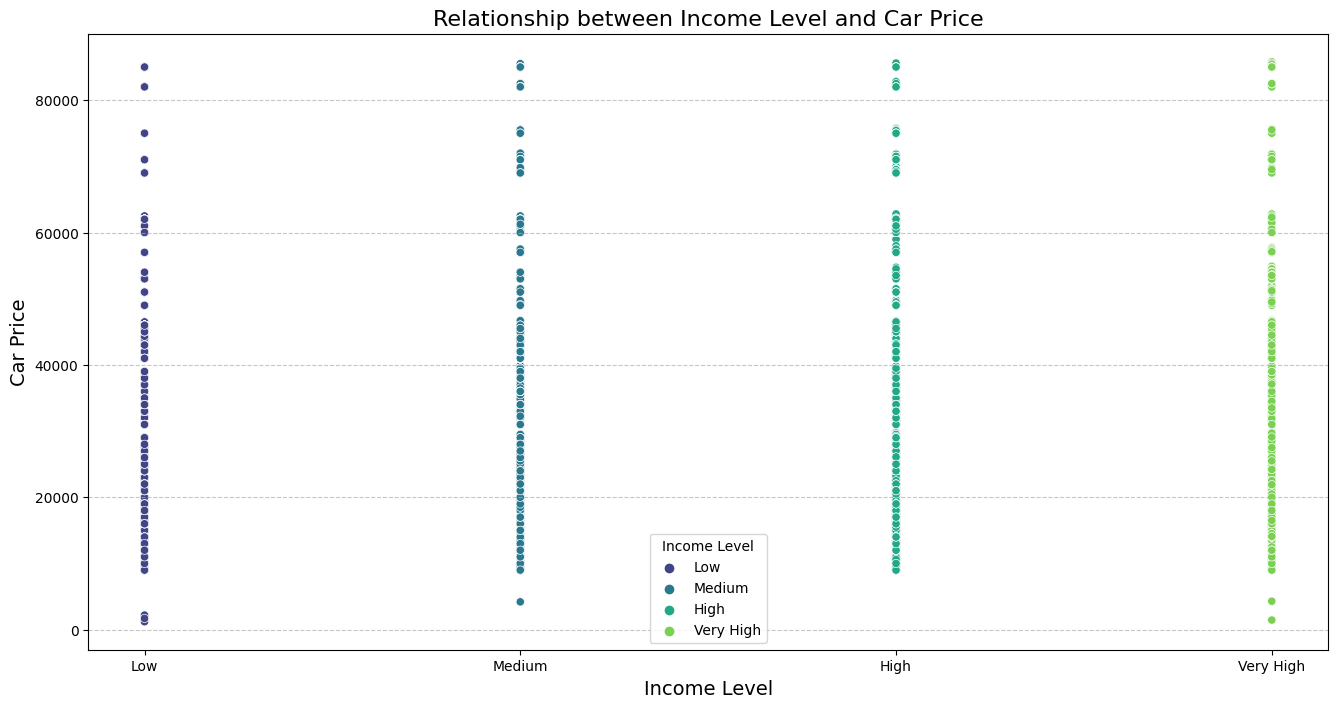

In [24]:
plt.figure(figsize=(16, 8))
sns.scatterplot(x= 'income_level', y= 'price', data= df, hue= 'income_level', palette= 'viridis')
plt.title('Relationship between Income Level and Car Price', fontsize= 16)
plt.xlabel('Income Level', fontsize= 14)
plt.ylabel('Car Price', fontsize= 14)
plt.legend(title= 'Income Level')
plt.grid(axis= 'y', linestyle= '--', alpha= 0.7);

The scatterplot above illustrates the relationship between income levels and car prices. Here are some key observations:

- **Distribution Similarity:** Across all income levels—Low, Medium, High, and Very High—there appears to be a diverse distribution of car prices. This indicates that individuals from various income brackets are purchasing both expensive and less expensive cars.
  
- **Lack of Income-Based Segregation:** Unlike what one might expect, there isn't a clear segregation of car prices based on income levels. In other words, individuals from different income brackets seem to be purchasing cars from a wide range of price categories.

- **Consumer Behavior Complexity:** The absence of a distinct pattern suggests that car purchasing behavior is influenced by factors beyond income level alone. Other factors such as personal preferences, lifestyle choices, and financing options likely play significant roles in determining the choice of car regardless of income level.

This insight implies that understanding consumer behavior in the automotive market requires a nuanced approach that considers various socio-economic and personal factors beyond just income.


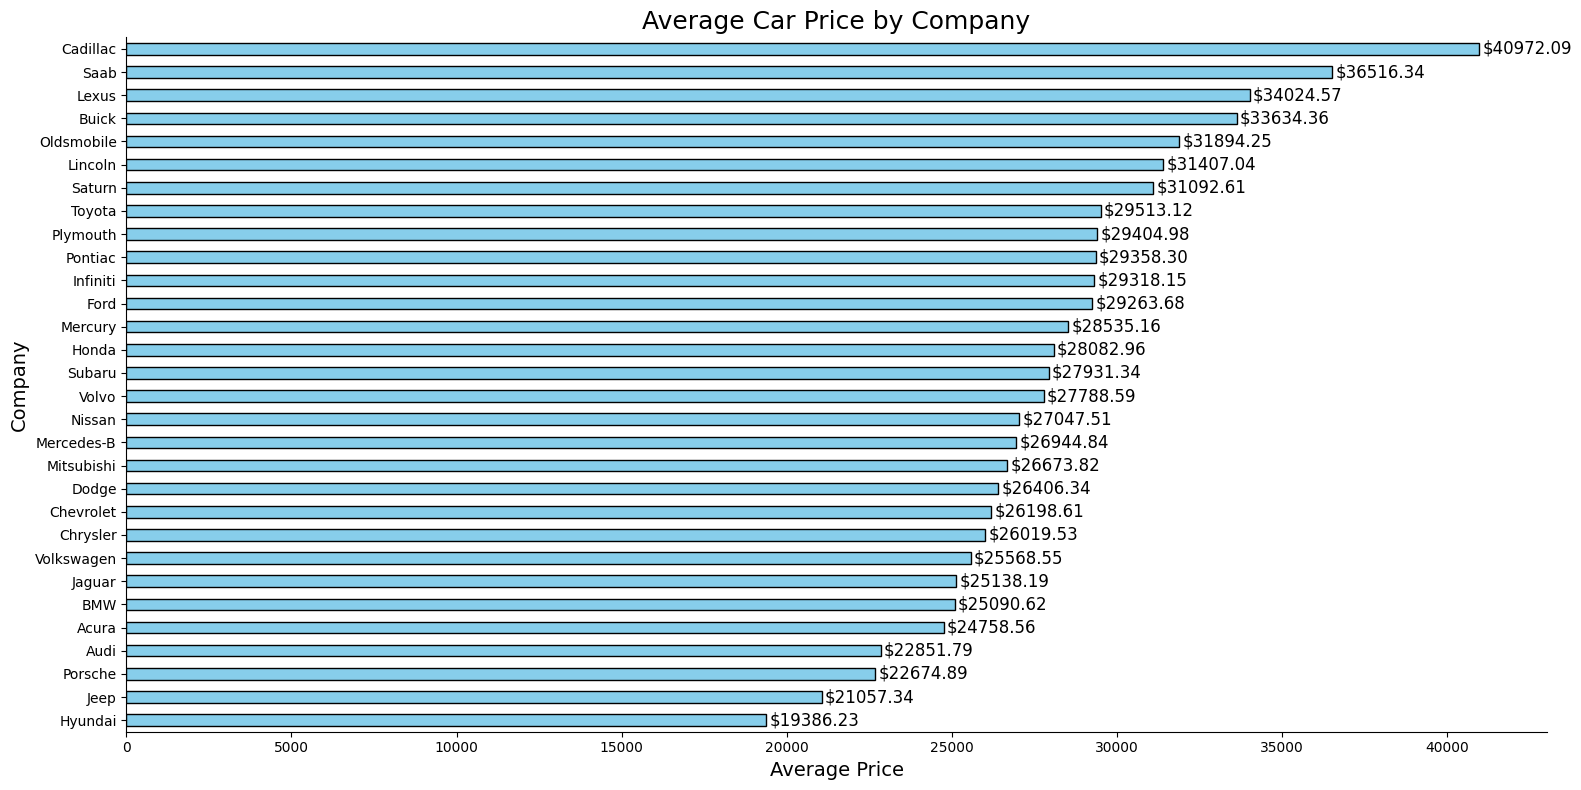

In [25]:
fig, ax = plt.subplots(figsize=(16, 8))

average_price_by_company = df.groupby('company').price.mean().sort_values()
average_price_by_company.plot(kind= 'barh', color= 'skyblue', edgecolor= 'black', ax= ax)

ax.set_title('Average Car Price by Company', fontsize=18)
ax.set_xlabel('Average Price', fontsize=14)
ax.set_ylabel('Company', fontsize=14)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

for index, value in enumerate(average_price_by_company):
    ax.text(value + 100, index, f'${value:.2f}', ha= 'left', va= 'center', fontsize= 12)

plt.tight_layout()


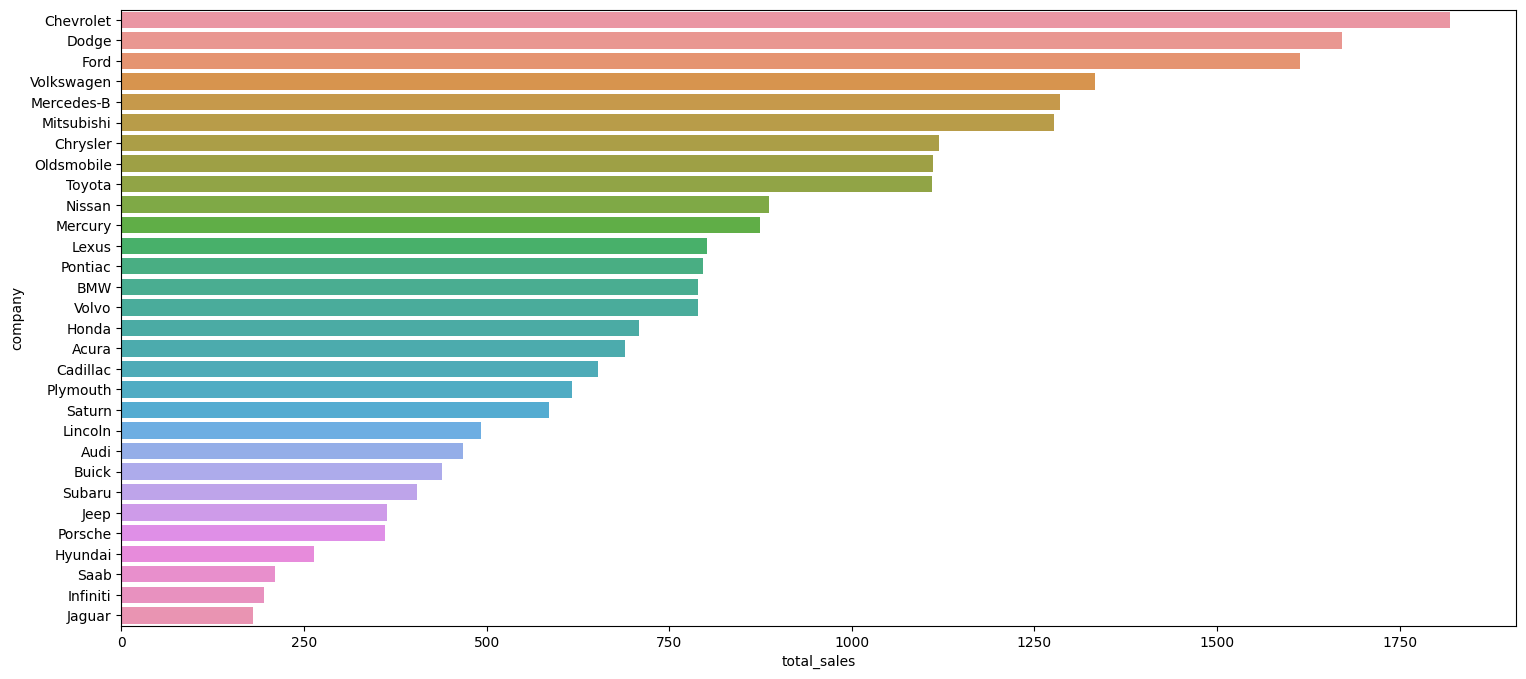

In [26]:
data= df.groupby('company').size().reset_index(name='total_sales').sort_values('total_sales', ascending= False)
plt.figure(figsize= (18, 8))
sns.barplot(data= data, x= 'total_sales', y= 'company');
# plt.title('Average Car Price by Company', fontsize=18)
# plt.xlabel('Average Price', fontsize=14)
# plt.ylabel('Company', fontsize=14)

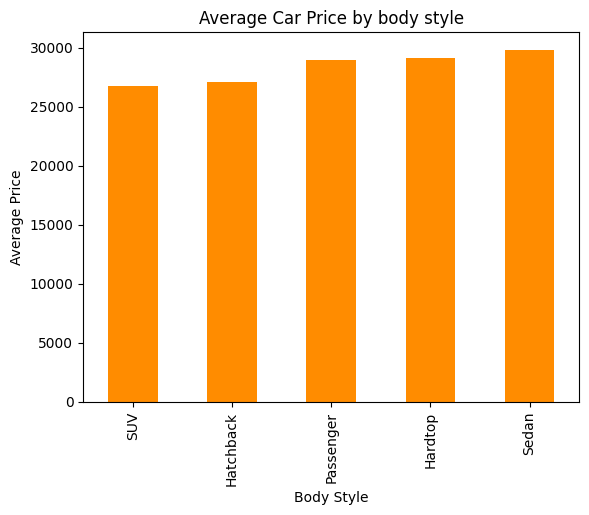

In [27]:
average_price_by_bodyStyle = df.groupby('body_style')['price'].mean().sort_values()

average_price_by_bodyStyle.plot(kind='bar', color='darkorange')

plt.title('Average Car Price by body style')
plt.xlabel('Body Style')
plt.ylabel('Average Price')

plt.show()

In [28]:
print('Min:')
print(df.groupby('engine')['price'].min(), end= '\n\n')
print('Max:')
print(df.groupby('engine')['price'].max(), end= '\n\n')
print('Avg:')
print(df.groupby('engine')['price'].mean())

Min:
engine
DoubleÂ Overhead Camshaft    1200
Overhead Camshaft            1700
Name: price, dtype: int64

Max:
engine
DoubleÂ Overhead Camshaft    75700
Overhead Camshaft            85800
Name: price, dtype: int64

Avg:
engine
DoubleÂ Overhead Camshaft    28248.525972
Overhead Camshaft            27914.710631
Name: price, dtype: float64


In [29]:
df['month'] = df['date'].dt.month_name()
df['year'] = df['date'].dt.year
df.head()

,date,car_id,body_style,annual_income,color,company,customer_name,dealer_name,dealer_no,dealer_region,engine,gender,model,price,transmission,income_level,month,year
0,2022-01-02,C_CND_000001,SUV,13500,Black,Ford,Geraldine,Buddy Storbeck's Diesel Service Inc,06457-3834,Middletown,DoubleÂ Overhead Camshaft,Male,Expedition,26000,Auto,Low,January,2022
1,2022-01-02,C_CND_000021,Sedan,13500,Black,Toyota,Adrianna,Clay Johnson Auto Sales,78758-7841,Austin,Overhead Camshaft,Male,4Runner,25000,Manual,Low,January,2022
2,2022-01-02,C_CND_000022,Hardtop,2500000,Black,Infiniti,Joshua,Classic Chevy,85257-3102,Austin,DoubleÂ Overhead Camshaft,Male,I30,21000,Auto,Very High,January,2022
3,2022-01-02,C_CND_000024,Passenger,920000,Pale White,Porsche,Arthur,Star Enterprises Inc,99301-3882,Pasco,DoubleÂ Overhead Camshaft,Male,Carrera Cabrio,18000,Auto,High,January,2022
4,2022-01-02,C_CND_000025,Passenger,672000,Pale White,Volkswagen,Lizzie,Suburban Ford,53546-9427,Janesville,DoubleÂ Overhead Camshaft,Male,Jetta,22000,Auto,Medium,January,2022


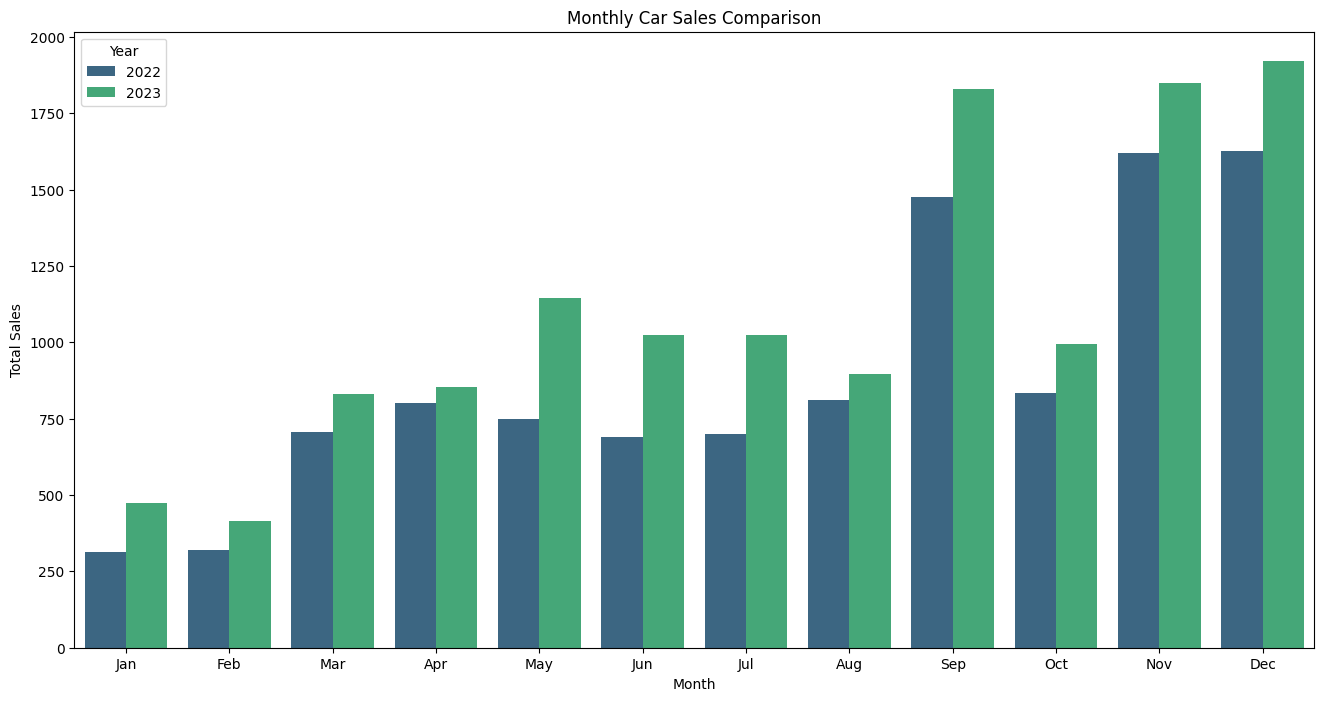

In [30]:
import calendar

month_order = list(calendar.month_name)[1:]
monthly_sales = df.groupby(['year', 'month']).size().reset_index(name='total_sales')

plt.figure(figsize=(16, 8))
ax = sns.barplot(x='month', y='total_sales', hue='year', data=monthly_sales, palette='viridis', order=month_order)

month_abbr = [month[:3] for month in month_order]
ax.set_xticklabels(month_abbr)

plt.title('Monthly Car Sales Comparison')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.legend(title='Year');

In [31]:
df.gender.value_counts()

Male      18798
Female     5108
Name: gender, dtype: int64

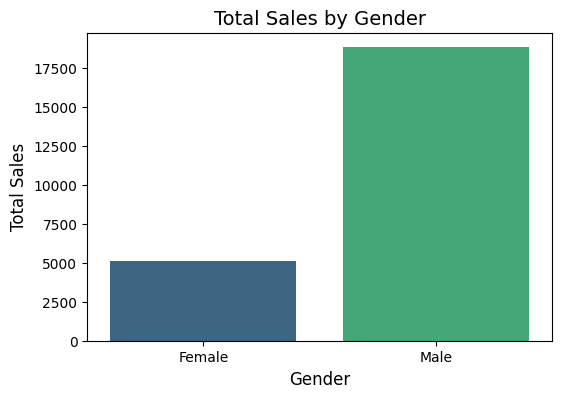

In [32]:
plt.figure(figsize=(6, 4))
bar_plot = sns.barplot(data=df.groupby('gender').size().reset_index(name='total_sales'), x='gender', y='total_sales', palette="viridis")

plt.title('Total Sales by Gender', fontsize=14)
plt.xlabel('Gender', fontsize=12)
plt.ylabel('Total Sales', fontsize=12)

plt.show()

## **Data Preprocessing**
Data preprocessing is a crucial step in building a machine learning model. We'll handle missing values, encode categorical variables, and scale numerical features as necessary to prepare the data for modeling.


In [33]:
df.isna().sum()

date             0
car_id           0
body_style       0
annual_income    0
color            0
company          0
customer_name    0
dealer_name      0
dealer_no        0
dealer_region    0
engine           0
gender           0
model            0
price            0
transmission     0
income_level     0
month            0
year             0
dtype: int64

In [34]:
df[df.engine == 'Overhead Camshaft'].transmission.unique()

array(['Manual'], dtype=object)

In [35]:
df[df.engine == 'DoubleÂ\xa0Overhead Camshaft'].transmission.unique()

array(['Auto'], dtype=object)

In [36]:
df.groupby(['company', 'body_style', 'model', 'transmission', 'color'])['price'].agg(['min', 'max', 'mean', 'count'])

min    max          mean  \
company body_style model transmission color                                    
Acura   Hatchback  TL    Auto         Black       23000  28800  26749.216495   
                                      Pale White  16000  29801  24617.514286   
                                      Red         16000  29751  24507.206897   
                         Manual       Black       21000  21900  21066.857143   
                                      Pale White  14000  14900  14119.137931   
...                                                 ...    ...           ...   
Volvo   Sedan      S40   Manual       Black       36000  36600  36081.258621   
                                      Pale White  17000  22801  18348.580645   
                                      Red         17000  22501  19108.661017   
                   S80   Manual       Pale White  21000  25600  21926.442623   
                                      Red         25000  25900  25086.280000   

                                                  count  
company body_style model transmission color              
Acura   Hatchback  TL    Auto         Black          97  
                                      Pale White     35  
                                      Red            58  
                         Manual       Black          21  
                                      Pale White     58  
...                                                 ...  
Volvo   Sedan      S40   Manual       Black          58  
                                      Pale White     62  
                                      Red            59  
                   S80   Manual       Pale White     61  
                                      Red            25  

[740 rows x 4 columns]

In [37]:
df.rename(columns= {'car_id': 'unique_id'}, inplace= True)
df['car_id'] = df.apply(lambda x: f"{x.company}_{x.body_style[:3]}_{x.model}_{x.transmission[0]}".upper(), axis= 1)
df.head()

,date,unique_id,body_style,annual_income,color,company,customer_name,dealer_name,dealer_no,dealer_region,engine,gender,model,price,transmission,income_level,month,year,car_id
0,2022-01-02,C_CND_000001,SUV,13500,Black,Ford,Geraldine,Buddy Storbeck's Diesel Service Inc,06457-3834,Middletown,DoubleÂ Overhead Camshaft,Male,Expedition,26000,Auto,Low,January,2022,FORD_SUV_EXPEDITION_A
1,2022-01-02,C_CND_000021,Sedan,13500,Black,Toyota,Adrianna,Clay Johnson Auto Sales,78758-7841,Austin,Overhead Camshaft,Male,4Runner,25000,Manual,Low,January,2022,TOYOTA_SED_4RUNNER_M
2,2022-01-02,C_CND_000022,Hardtop,2500000,Black,Infiniti,Joshua,Classic Chevy,85257-3102,Austin,DoubleÂ Overhead Camshaft,Male,I30,21000,Auto,Very High,January,2022,INFINITI_HAR_I30_A
3,2022-01-02,C_CND_000024,Passenger,920000,Pale White,Porsche,Arthur,Star Enterprises Inc,99301-3882,Pasco,DoubleÂ Overhead Camshaft,Male,Carrera Cabrio,18000,Auto,High,January,2022,PORSCHE_PAS_CARRERA CABRIO_A
4,2022-01-02,C_CND_000025,Passenger,672000,Pale White,Volkswagen,Lizzie,Suburban Ford,53546-9427,Janesville,DoubleÂ Overhead Camshaft,Male,Jetta,22000,Auto,Medium,January,2022,VOLKSWAGEN_PAS_JETTA_A


In [38]:
df.columns

Index(['date', 'unique_id', 'body_style', 'annual_income', 'color', 'company',
       'customer_name', 'dealer_name', 'dealer_no', 'dealer_region', 'engine',
       'gender', 'model', 'price', 'transmission', 'income_level', 'month',
       'year', 'car_id'],
      dtype='object')

In [ ]:
df.drop(columns= ['month', 'year'])[['date', 'unique_id', 'car_id', 'company', 'body_style', 'model',  'color', 'transmission', 'engine',
       'customer_name', 'gender', 'annual_income', 'income_level', 'dealer_name', 'dealer_no', 'dealer_region', 
        'price']].to_csv("Data\\formatted_data.csv", index= False)

### **Statistical test**

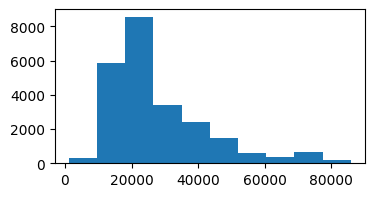

In [40]:
plt.figure(figsize=(4,2))
plt.hist(df['price']);

Use the empirical rule to observe the data, then test and verify that it is normally distributed.

The empirical rule states that, for every normal distribution: 
- 68% of the data fall within 1 standard deviation of the mean
- 95% of the data fall within 2 standard deviations of the mean
- 99.7% of the data fall within 3 standard deviations of the mean

Now, check the first part of the empirical rule: whether 68% of the `price` data falls within 1 standard deviation of the mean.


In [41]:
mean_price = df['price'].mean()
std_price  = df['price'].std()
print('Mean:',mean_price)
print('Standard Deviation:',std_price)

Mean: 28090.247845729107
Standard Deviation: 14788.687607755426


In [42]:
lower_limit = mean_price - 1*std_price
upper_limit = mean_price + 1*std_price

print(lower_limit,',',upper_limit)

13301.560237973681 , 42878.93545348453


In [43]:
print('Percentage of data falls within 1 standard deviation of mean:',((df['price'] >= lower_limit) & (df['price'] <= upper_limit)).mean()*100)

Percentage of data falls within 1 standard deviation of mean: 75.95164393876016


Now, consider the second part of the empirical rule: whether 95% of the `price` data falls within 2 standard deviations of the mean.


In [44]:
lower_limit = mean_price - 2*std_price
upper_limit = mean_price + 2*std_price
print(upper_limit,',',upper_limit)

57667.62306123996 , 57667.62306123996


In [45]:
print('Percentage of data falls within 2 standard deviation mean:',((df['price'] >= lower_limit) & (df['price'] <= upper_limit)).mean()*100)

Percentage of data falls within 2 standard deviation mean: 93.93039404333639


Now, consider the second part of the empirical rule: whether 99.7% of the `price` data falls within 2 standard deviations of the mean.


In [46]:
lower_limit = mean_price - 3*std_price
upper_limit = mean_price + 3*std_price
print(upper_limit,',',upper_limit)

72456.31066899539 , 72456.31066899539


In [47]:
print('Percentage of data falls within 3 standard deviation mean:',((df['price'] >= lower_limit) & (df['price'] <= upper_limit)).mean()*100)

Percentage of data falls within 3 standard deviation mean: 98.53174935162721


The 93.93% is close to 95%, and the 98.53% is also close to 99.7%. The 75.95% is not as close to 68%, but relatively close. Overall, from applying the empirical rule, the data appears to be not exactly normal. 

### **Performing Hypothesis testing**
Using some more Statistical test to conclude weather our `price` column is normally distributed or not.

#### **Stating Hypothesis:**
**Null Hypothesis (H0)**: Our data is normally distributed.

**Alternative Hypothesis (H1)**: Our data is not normally distributed.

In [48]:
from scipy.stats import shapiro

stat, p_value = shapiro(df['price'])

print("Shapiro-Wilk Test p-value:", p_value)

if p_value < 0.05:
    print("Reject the null hypothesis")
else:
    print("Failed to reject the null hypothesis")

Shapiro-Wilk Test p-value: 0.0
Reject the null hypothesis


In [49]:
from scipy.stats import anderson

result1 = anderson(df['price'], dist='norm')

print("Anderson-Darling Test Statistic:", result1.statistic)
print("Critical Values:", result1.critical_values)

if result1.statistic > result1.critical_values[2]:
    print("Reject the null hypothesis")
else:
    print("Failed to reject the null hypothesis")


Anderson-Darling Test Statistic: 1030.710844066416
Critical Values: [0.576 0.656 0.787 0.918 1.092]
Reject the null hypothesis


- We reject the null hypothesis in both tests. 
- So our conclusion was correct that data appears to be not normal. 

#### **Performing log-normal transformation**

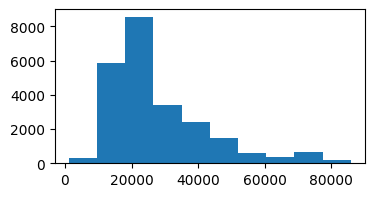

In [50]:
plt.figure(figsize=(4,2))
plt.hist(df['price']);

Our data is right-skewed so will perform a log-normal transformation on data to make it more symmetric.

In [51]:
df['log_price'] = np.log(df['price'])

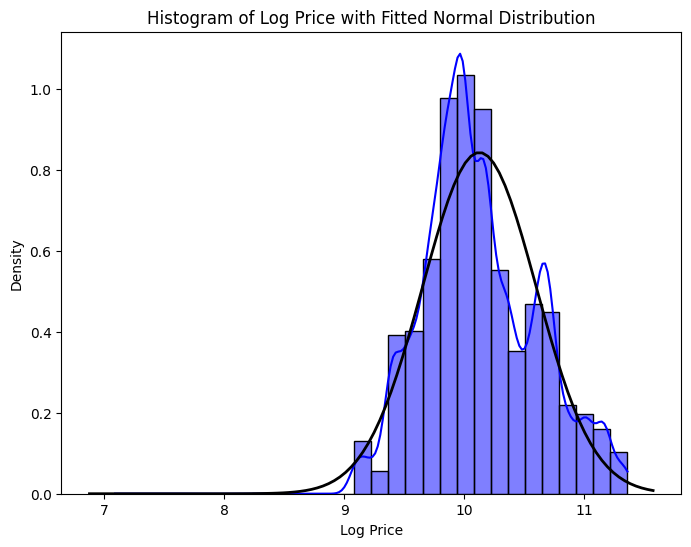

In [52]:
from scipy.stats import norm

plt.figure(figsize=(8, 6))
sns.histplot(df['log_price'], kde=True, color='blue', bins=30, stat='density')

mu, std = norm.fit(df['log_price'])
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)

plt.plot(x, p, 'k', linewidth=2)

plt.xlabel('Log Price')
plt.ylabel('Density')
plt.title('Histogram of Log Price with Fitted Normal Distribution')

plt.show()


So we can see that our data become more symmetric and looks like it is following the normal distribution 

Again using the empirical rule to observe the data, then test and verify that it is normally distributed.


In [53]:
import numpy as np
from scipy.stats import norm

def empirical_rule_test(data):
    mean = np.mean(data)
    std_dev = np.std(data)
    
    range_1std = (mean - std_dev, mean + std_dev)
    range_2std = (mean - 2 * std_dev, mean + 2 * std_dev)
    range_3std = (mean - 3 * std_dev, mean + 3 * std_dev)
    
    pct_within_1std = np.mean((data >= range_1std[0]) & (data <= range_1std[1])) * 100
    pct_within_2std = np.mean((data >= range_2std[0]) & (data <= range_2std[1])) * 100
    pct_within_3std = np.mean((data >= range_3std[0]) & (data <= range_3std[1])) * 100
    print('Percentage of data falls within 1 standard deviation mean:', pct_within_1std)
    print('Percentage of data falls within 2 standard deviation mean:', pct_within_2std)
    print('Percentage of data falls within 3 standard deviation mean:', pct_within_3std)
    
    if np.isclose(pct_within_1std, 68, atol=5) and np.isclose(pct_within_2std, 95, atol=5) and np.isclose(pct_within_3std, 99.7, atol=5):
        return "The data approximately follows a normal distribution according to the empirical rule."
    else:
        return "The data does not follow a normal distribution according to the empirical rule."

result = empirical_rule_test(df['log_price'])
print(result)


Percentage of data falls within 1 standard deviation mean: 66.39337404835605
Percentage of data falls within 2 standard deviation mean: 95.03890236760645
Percentage of data falls within 3 standard deviation mean: 99.97490169831842
The data approximately follows a normal distribution according to the empirical rule.


- Now our data is normally distributed.
- It was neccessary to make sure that our data follows a normal distribution because most of the `Machine Learning Models` assume that our data is normally distributed.

In [54]:
new_df = df[['car_id','body_style','color','company','dealer_name','dealer_region','model','transmission','price','log_price']]

In [55]:
ford_suv_expedition_a = df[df['car_id'] == 'FORD_SUV_EXPEDITION_A']

grouped = ford_suv_expedition_a.groupby(['dealer_region', 'dealer_name'])

price_comparison = grouped['price'].mean()

price_comparison_sorted = price_comparison.sort_values()

print(price_comparison_sorted)

dealer_region  dealer_name                                    
Janesville     Suburban Ford                                      26000.000000
Middletown     Diehl Motor CO Inc                                 26000.000000
Janesville     Iceberg Rentals                                    26000.000000
Austin         Motor Vehicle Branch Office                        26000.000000
Pasco          Pitre Buick-Pontiac-Gmc of Scottsdale              26000.000000
Janesville     U-Haul CO                                          26000.000000
Scottsdale     Classic Chevy                                      26000.000000
Aurora         Ryder Truck Rental and Leasing                     26000.000000
               Gartner Buick Hyundai Saab                         26000.000000
Pasco          Progressive Shippers Cooperative Association No    26000.000000
Greenville     Scrivener Performance Engineering                  26000.333333
Middletown     Ryder Truck Rental and Leasing                     26

We can conclude from our observation that there is not a fixed price of a car, it can vary on the region and dealer

### **ANOVA TEST**
Performing ANOVA test to determine weather there are statistical significant differences in prices across different dealers names and regions for each unique car or not.


**Null Hupothesis (H0)** : There is no significant difference in prices across different dealers names and regions for each unique car

**Alternative Hypothesis (H1)** : There is significant difference in prices across different dealers and regions for each unique car

In [56]:
from scipy.stats import f_oneway

grouped_prices = []
for (car_id, dealer_name, dealer_region), group in df.groupby(['car_id', 'dealer_name', 'dealer_region']):
    grouped_prices.append(group['price'])

f_statistic, p_value = f_oneway(*grouped_prices)

print("ANOVA results:")
print("F-statistic:", f_statistic)
print("p-value:", p_value)

alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: There are significant differences in prices across different dealers names and regions for each unique car.")
else:
    print("Fail to reject the null hypothesis: There are no significant differences in prices across different dealers and regions for each unique car.")


ANOVA results:
F-statistic: 2.1206389371753045
p-value: 0.0
Reject the null hypothesis: There are significant differences in prices across different dealers names and regions for each unique car.


## **Model Building & Evaluation**
- In this section, we'll experiment with different machine learning algorithms such as linear regression and random forests. We'll train the models on a training set and evaluate their performance using appropriate metrics.

- After training and tuning our models, we'll evaluate their performance on a separate test set. We'll use metrics such as Mean Absolute Error (MAE), Mean Squared Error (MSE), and Adjusted R-squared to assess the accuracy and reliability of our predictions.



### **Linear Regression**
Linear regression is a fundamental statistical method used for modeling the relationship between a dependent variable and one or more independent variables. It assumes a linear relationship between the predictor variables and the target variable.

Linear regression aims to find the best-fit line that represents the relationship between the independent variables (features) and the dependent variable (target).


In [57]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import r2_score


X = new_df.drop(['car_id','price','log_price'], axis=1)
y = df['log_price']

X_encoded = pd.get_dummies(X)

X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

In [58]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [59]:
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

In [60]:
def model_evaluation(y_pred_train, y_pred_test):

    train_rmse = mean_squared_error(y_train, y_pred_train, squared=False)
    test_rmse = mean_squared_error(y_test, y_pred_test, squared=False)

    train_mse = mean_squared_error(y_train, y_pred_train, squared=True)
    test_mse = mean_squared_error(y_test, y_pred_test, squared=True)

    train_mae = mean_absolute_error(y_train, y_pred_train)
    test_mae = mean_absolute_error(y_test, y_pred_test)

    train_r2 = r2_score(y_train, y_pred_train)
    test_r2 = r2_score(y_test, y_pred_test)

    num_predictors = X_train.shape[1] 

    def adjusted_r2(r2, n, p):
        return 1 - (1 - r2) * ((n - 1) / (n - p - 1))

    train_adjusted_r2 = adjusted_r2(train_r2, len(y_train), num_predictors)
    test_adjusted_r2 = adjusted_r2(test_r2, len(y_test), num_predictors)

    return train_rmse, test_rmse, train_mse, test_mse, train_mae, test_mae, train_adjusted_r2, test_adjusted_r2

In [61]:
def print_result(train_rmse, test_rmse, train_mse, test_mse, train_mae, test_mae, train_adjusted_r2, test_adjusted_r2):    
    print("Linear Regression Performance:")
    print(f"Train MAE: {train_mae}")
    print(f"Test MAE: {test_mae}")
    print('')
    print(f"Train MSE: {train_mse}")
    print(f"Test MSE: {test_mse}")
    print('')
    print(f"Train RMSE: {train_rmse}")
    print(f"Test RMSE: {test_rmse}")
    print('')
    print("Adjusted R-squared (Train):", train_adjusted_r2)
    print("Adjusted R-squared (Test):", test_adjusted_r2)

In [62]:
train_rmse, test_rmse, train_mse, test_mse, train_mae, test_mae, train_adjusted_r2, test_adjusted_r2 = model_evaluation(y_pred_train, y_pred_test)

print_result(train_rmse, test_rmse, train_mse, test_mse, train_mae, test_mae, train_adjusted_r2, test_adjusted_r2)

Linear Regression Performance:
Train MAE: 0.320970052124871
Test MAE: 0.3335799560912702

Train MSE: 0.16663990062869585
Test MSE: 0.17342616548762094

Train RMSE: 0.40821550757987607
Test RMSE: 0.4164446727809361

Adjusted R-squared (Train): 0.2464501890198152
Adjusted R-squared (Test): 0.19120965727628536


In [63]:
new_df.iloc[23903]['price']

18000

In [64]:
def model_pred(model,index):
    new_data = X_encoded.iloc[index].values.reshape(1, -1)
    predicted_log_price = model.predict(new_data)
    predicted_price = np.exp(predicted_log_price)
    print(f"Predicted Price: {predicted_price}")

In [65]:
model_pred(model,23903)

Predicted Price: [26157.07532976]


- We can see that our `Linear Regression` model has low variance but high bias.
- Which means that our model did not perform well on both training and testing data.

### **Random Forest Regressor**
Random Forest Regression is a powerful machine learning algorithm used for both classification and regression tasks. It is an ensemble learning method that combines multiple decision trees to make predictions. Unlike traditional decision trees, which are prone to overfitting, Random Forests mitigate overfitting by averaging the predictions of multiple trees.


In [66]:
from sklearn.ensemble import RandomForestRegressor

In [67]:
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
rf_regressor.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [68]:
y_pred_train = rf_regressor.predict(X_train)
y_pred_test = rf_regressor.predict(X_test)

In [69]:
train_rmse_rf, test_rmse_rf, train_mse_rf, test_mse_rf, train_mae_rf, test_mae_rf, train_adjusted_r2_rf, test_adjusted_r2_rf = model_evaluation(y_pred_train, y_pred_test)

print_result(train_rmse_rf, test_rmse_rf, train_mse_rf, test_mse_rf, train_mae_rf, test_mae_rf, train_adjusted_r2_rf, test_adjusted_r2_rf)

Linear Regression Performance:
Train MAE: 0.08921630828834824
Test MAE: 0.15467090548224818

Train MSE: 0.030849163218375546
Test MSE: 0.08061203296613094

Train RMSE: 0.17563929861615693
Test RMSE: 0.28392258269840204

Adjusted R-squared (Train): 0.8604993100427913
Adjusted R-squared (Test): 0.6240576871026635


In [70]:
new_df.iloc[23905]['price']

27500

In [71]:
model_pred(rf_regressor, 23905)

Predicted Price: [27782.69887739]


### **XGBoost Regressor**
XGBoost is a powerful machine learning algorithm that is particularly effective for regression tasks. It is an implementation of gradient boosted decision trees designed for speed and performance. In this section, we'll explore the use of XGBoost for predicting automobile prices.

XGBoost stands for eXtreme Gradient Boosting, which is an ensemble learning method that builds a series of decision trees sequentially. Each tree is trained to correct the errors of its predecessor, leading to a highly accurate predictive model.


In [72]:
from xgboost import XGBRegressor

In [73]:
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

xgb_regressor = XGBRegressor(n_estimators=300, random_state=42)
xgb_regressor.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=300, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [74]:
y_pred_train = xgb_regressor.predict(X_train)
y_pred_test = xgb_regressor.predict(X_test)

In [75]:
train_rmse_xg, test_rmse_xg, train_mse_xg, test_mse_xg, train_mae_xg, test_mae_xg, train_adjusted_r2_xg, test_adjusted_r2_xg = model_evaluation(y_pred_train, y_pred_test)

print_result(train_rmse_xg, test_rmse_xg, train_mse_xg, test_mse_xg, train_mae_xg, test_mae_xg, train_adjusted_r2_xg, test_adjusted_r2_xg)

Linear Regression Performance:
Train MAE: 0.13805272285945716
Test MAE: 0.16960271650659034

Train MSE: 0.048235838373760054
Test MSE: 0.07221650262972482

Train RMSE: 0.21962658849456287
Test RMSE: 0.26873128331053087

Adjusted R-squared (Train): 0.7818763288271046
Adjusted R-squared (Test): 0.6632110861243004


In [76]:
new_df.iloc[5]['price']

31250

In [77]:
model_pred(xgb_regressor, 5)

Predicted Price: [31263.346]


## **Hyperparameter Tuning and Evaluation**
To improve the performance of our models, we'll perform hyperparameter tuning using techniques like grid search or random search. Tuning the hyperparameters can help us find the best configuration for each algorithm.


Since, our both models `Random Forest Regressor` and `XGBoost Regressor` performed good. We will Tune both models and then compare the performance. 

### **Tuning Random Forest**

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [150, 200],
    'max_depth': [None],
    'min_samples_split': [10, 20],
    'min_samples_leaf': [1, 4]
}

In [ ]:
%%time

rf_regressor = RandomForestRegressor(random_state=42)

rf_grid_search = GridSearchCV(estimator=rf_regressor, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', verbose=1, n_jobs=2)

rf_grid_search.fit(X_train, y_train) 

Fitting 5 folds for each of 8 candidates, totalling 40 fits
CPU times: total: 1min 16s
Wall time: 44min 40s


GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42), n_jobs=2,
             param_grid={'max_depth': [None], 'min_samples_leaf': [1, 4],
                         'min_samples_split': [10, 20],
                         'n_estimators': [150, 200]},
             scoring='neg_mean_squared_error', verbose=1)

In [ ]:
rf_best_params = rf_grid_search.best_params_
rf_best_score = rf_grid_search.best_score_

best_rf_regressor = rf_grid_search.best_estimator_
y_pred_train = best_rf_regressor.predict(X_train)
y_pred_test = best_rf_regressor.predict(X_test)

In [ ]:
rf_train_rmse_cv, rf_test_rmse_cv, rf_train_mse_cv, rf_test_mse_cv, rf_train_mae_cv, rf_test_mae_cv, rf_train_adjusted_r2_cv, rf_test_adjusted_r2_cv = model_evaluation(y_pred_train, y_pred_test)

print_result(rf_train_rmse_cv, rf_test_rmse_cv, rf_train_mse_cv, rf_test_mse_cv, rf_train_mae_cv, rf_test_mae_cv, rf_train_adjusted_r2_cv, rf_test_adjusted_r2_cv)

Grid Search Random Forest Regressor Performance:
Best Parameters: {'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 20, 'n_estimators': 150}
Best RMSE: -0.07143677038082734

Train MSE: 0.14116034263992958
Test MSE: 0.15965398191228222

Train MSE: 0.0551236723652355
Test MSE: 0.06917389234665375

Train RMSE: 0.23478431030466132
Test RMSE: 0.26300930087480506

Adjusted R-squared (Train): 0.7507293707290905
Adjusted R-squared (Test): 0.6774006047975678


In [ ]:
new_df.iloc[5]['price']

31250

In [ ]:
model_pred(best_rf_regressor, 5)

Predicted Price: [31721.5099604]


### **Tuning XGBoost**

In [ ]:
param_grid = {
    'learning_rate': [0.05, 0.1, 0.3],  
    'max_depth': [None],
    'min_child_weight': [1, 2, 3],
    'gamma': [0, 0.1, 0.2],
    'colsample_bytree': [0.7, 0.8, 0.9],
    'n_estimators' : [150, 200, 300]
}

In [ ]:
%%time

xgb_regressor = XGBRegressor(random_state=42)

xgb_grid_search = GridSearchCV(estimator=xgb_regressor, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', verbose=1, n_jobs=2)

xgb_grid_search.fit(X_train, y_train) 

Fitting 5 folds for each of 243 candidates, totalling 1215 fits
CPU times: total: 23.3 s
Wall time: 16min 52s


GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, m...
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None,
                                    random_state=42, ...),
             n_jobs=2,
             param_grid={'colsample_bytree': [0.7, 0.8, 0.9],
                         'gamma': [0, 0.1, 0.2],
                         'learning_rate': [0.05, 0.1, 0.3], 'max_depth': [None],
                         'min_child_weight': [1, 2, 3],
                         'n_estimators': [150, 200, 300]},
             scoring='neg_mean_squared_error', verbose=1)

In [ ]:
xgb_best_params = xgb_grid_search.best_params_
xgb_best_score = xgb_grid_search.best_score_

best_xgb_regressor = xgb_grid_search.best_estimator_
y_pred_train = best_xgb_regressor.predict(X_train)
y_pred_test = best_xgb_regressor.predict(X_test)

In [ ]:
xgb_train_rmse_cv, xgb_test_rmse_cv, xgb_train_mse_cv, xgb_test_mse_cv, xgb_train_mae_cv, xgb_test_mae_cv, xgb_train_adjusted_r2_cv, xgb_test_adjusted_r2_cv = model_evaluation(y_pred_train, y_pred_test)

print_result(xgb_train_rmse_cv, xgb_test_rmse_cv, xgb_train_mse_cv, xgb_test_mse_cv, xgb_train_mae_cv, xgb_test_mae_cv, xgb_train_adjusted_r2_cv, xgb_test_adjusted_r2_cv)

Grid Search XGBoost Regressor Performance:
Best Parameters: {'colsample_bytree': 0.9, 'gamma': 0, 'learning_rate': 0.3, 'max_depth': None, 'min_child_weight': 3, 'n_estimators': 300}
Best RMSE: -0.0739263717029591

Train MAE: 0.14284073827373683
Test MAE: 0.16843028965298337

Train MSE: 0.050977489860298354
Test MSE: 0.07066785122609341

Train RMSE: 0.22578195202517484
Test RMSE: 0.26583425517809667

Adjusted R-squared (Train): 0.7694785120277664
Adjusted R-squared (Test): 0.670433377501042


In [ ]:
new_df.iloc[300]['price']

33000

In [ ]:
model_pred(best_xgb_regressor, 300)

Predicted Price: [28174.613]


In [ ]:
data = {
    'Model': ['Linear Regression', 'Random Forest Regressor','XGBoost Regressor', 'Tuned Random Forest', 'Tuned XGBoost'],
    'Train MAE': [train_mae, train_mae_rf, train_mae_xg, rf_train_mae_cv, xgb_train_mae_cv],
    'Test MAE' : [test_mae, test_mae_rf, test_mae_xg, rf_test_mae_cv, xgb_test_mae_cv],
    'Train MSE': [train_mse, train_mse_rf, train_mse_xg,rf_train_mse_cv, xgb_train_mse_cv],
    'Test MSE' : [test_mse, test_mse_rf, test_mse_xg, rf_test_mse_cv, xgb_test_mse_cv],
    'Train RMSE':[train_rmse, train_rmse_rf, train_rmse_xg,rf_train_rmse_cv, xgb_train_rmse_cv],
    'Test RMSE': [test_rmse, test_rmse_rf, test_rmse_xg,rf_test_rmse_cv, xgb_test_rmse_cv],
    'Adjusted R-squared (Train)' : [train_adjusted_r2, train_adjusted_r2_rf, train_adjusted_r2_xg, rf_train_adjusted_r2_cv, xgb_train_adjusted_r2_cv],
    'Adjusted R-squared (Test)'  : [test_adjusted_r2, test_adjusted_r2_rf, test_adjusted_r2_xg, rf_test_adjusted_r2_cv, xgb_test_adjusted_r2_cv]
}

Evaluation_df = pd.DataFrame(data)
Evaluation_df

,Model,Train MAE,Test MAE,Train MSE,Test MSE,Train RMSE,Test RMSE,Adjusted R-squared (Train),Adjusted R-squared (Test)
0,Linear Regression,0.320970,0.333580,0.166640,0.173426,0.408216,0.416445,0.246450,0.191210
1,Random Forest Regressor,0.089216,0.154671,0.030849,0.080612,0.175639,0.283923,0.860499,0.624058
2,XGBoost Regressor,0.138053,0.169603,0.048236,0.072217,0.219627,0.268731,0.781876,0.663211
3,Tuned Random Forest,0.141160,0.159654,0.055124,0.069174,0.234784,0.263009,0.750729,0.677401
4,Tuned XGBoost,0.142841,0.168430,0.050977,0.070668,0.225782,0.265834,0.769479,0.670433


We have to chose the model with `Low Variance` as well as `Low Bias` because Ideally, we want to find a model that strikes a balance between bias and variance, achieving low overall error on unseen data. This balance is often referred to as the `bias-variance tradeoff`.

## **Conclusion**
In conclusion, considering the bias-variance trade-off and computational efficiency:

- **Random Forest Regressor**:
  - Test MAE: 0.155, Test MSE: 0.081, Test RMSE: 0.284, Adjusted R-squared (Test): 0.624
  - Performs the best in terms of test performance and R-squared value but with a trade-off of higher training time.
  
- **XGBoost Regressor**:
  - Test MAE: 0.170, Test MSE: 0.072, Test RMSE: 0.269, Adjusted R-squared (Test): 0.663
  - Provides competitive performance with less training time compared to Random Forest, making it a favorable choice for large datasets or when computational resources are limited.
  
- **Tuned Random Forest**:
  - Test MAE: 0.160, Test MSE: 0.069, Test RMSE: 0.263, Adjusted R-squared (Test): 0.677
  - Shows slight improvements over the base Random Forest model, indicating the effectiveness of hyperparameter tuning in reducing overfitting and improving generalization.
  
- **Tuned XGBoost**:
  - Test MAE: 0.168, Test MSE: 0.071, Test RMSE: 0.266, Adjusted R-squared (Test): 0.670
  - Offers similar performance to the tuned Random Forest, showing a good balance between bias and variance.
  
- **Linear Regression**:
  - Test MAE: 0.334, Test MSE: 0.173, Test RMSE: 0.416, Adjusted R-squared (Test): 0.191
  - While computationally efficient, lacks the predictive power compared to ensemble methods like Random Forest and XGBoost.
  
  
Considering the test set size is crucial to assess the models' generalization performance effectively.


